In [1]:
# 导入工具包
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#导入数据集
df = pd.read_excel("dataset/jester.xls", header=None, na_values=99)

In [2]:
# 查看数据集基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24938 entries, 0 to 24937
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.2 MB


In [3]:
# 查看数据集各列信息
count_series = df.count()
count_series

0      24938
1         65
2        139
3          5
4          3
       ...  
96      1903
97      1954
98      1862
99      1968
100        4
Length: 101, dtype: int64

In [4]:
# 将df.count()的结果按照count的个数从大到小排序
print(df.count().sort_values(ascending=False))

0      24938
17     24934
8      24933
20     24932
19     24931
       ...  
6         14
3          5
100        4
4          3
9          1
Length: 101, dtype: int64


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,26,NaN,NaN,NaN,NaN,-1.65,NaN,-0.78,6.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33,NaN,NaN,NaN,NaN,-9.27,NaN,-9.17,-8.59,NaN,...,NaN,NaN,-2.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,NaN,NaN,NaN,NaN,-6.12,NaN,-7.48,-7.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,NaN,0.05,NaN,NaN,-2.82,NaN,-4.85,-0.87,NaN,...,NaN,NaN,NaN,NaN,1.84,NaN,NaN,NaN,-4.08,NaN
4,22,NaN,NaN,NaN,NaN,-4.95,NaN,6.21,2.72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(0, axis=1)

# 使用序列的boolean indexing，筛选出那些有效元素小于100个的列的索引，返回一个列表
drop_list = count_series[count_series < 100].index.tolist()

# 使用df.drop方法，传入列表作为参数，删除对应的列，并返回一个新的数据框
df = df.drop(drop_list, axis=1)

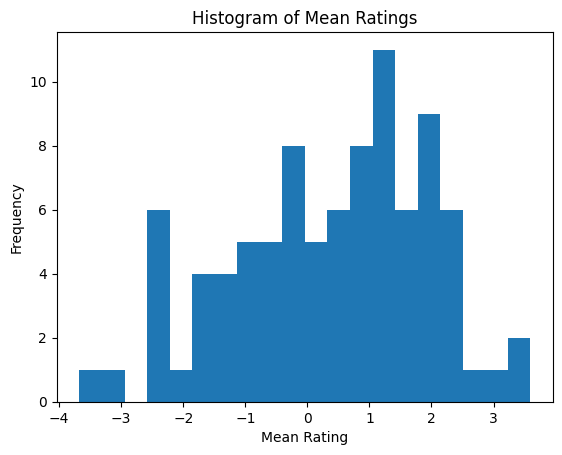

In [7]:
# 查看每一列的均值所形成的图形
# 使用pandas库的mean方法，计算每一列的均值，并返回一个序列
mean_series = df.mean()

# 使用pandas库的replace方法，将缺失值（即99）替换为0
mean_series = mean_series.replace(99,0)

# 使用matplotlib库绘制直方图，设置标题、横轴标签、纵轴标签和网格线，并显示图像
plt.hist(mean_series, bins=20)
plt.title("Histogram of Mean Ratings")
plt.xlabel("Mean Rating")
plt.ylabel("Frequency")
plt.show()

In [26]:
# 参数估计函数 / 置信区间计算
def Para_point_est(x, num=20, random_state=0, alpha = 0.05):
    """
    x是Series类型的数据
    num指随机抽样20个数据
    random_state是随机数种子，固定每次抽样的结果
    alpha是1-置信度，这里是显著性水平
    """
    # 选择要抽取的样本行，例如随机抽取【num】个数据
    sample = x.sample(n=num, random_state=0)

    # 选择要使用的分布类型，例如正态分布
    dist = stats.norm

    # 计算样本和总体的均值和方差
    sample_mean = sample.mean()
    sample_var = sample.var()
    pop_mean = x.mean()
    pop_var = x.var()

    # 打印样本和总体的均值和方差
    # print(f"sample: ", sample)
    print(f"Sample mean: {sample_mean:.3f}")
    print(f"Sample variance: {sample_var:.3f}")
    print(f"Population mean: {pop_mean:.3f}")
    print(f"Population variance: {pop_var:.3f}")
    
    ########################################################
    
    # 计算均值的置信区间
    t_critical = stats.t.ppf(1-alpha/2,num-1) # 计算t分布的临界值
    # print("t_critical = ", t_critical )
    margin_of_error = t_critical * np.sqrt(sample_var/num) # 计算误差边际
    lower_bound = sample_mean - margin_of_error # 计算下限
    upper_bound = sample_mean + margin_of_error # 计算上限
    print(f"The confidence interval for the mean is: ({lower_bound:.3f}, {upper_bound:.3f})")

    # 计算方差的置信区间
    chi_critical_lower = stats.chi2.ppf(alpha/2,num-1) # 计算卡方分布的下临界值
    chi_critical_upper = stats.chi2.ppf(1-alpha/2,num-1) # 计算卡方分布的上临界值
    lower_bound = ((num-1) * sample_var) / chi_critical_upper # 计算下限
    upper_bound = ((num-1) * sample_var) / chi_critical_lower # 计算上限
    print(f"The confidence interval for the variance is: ({lower_bound:.3f}, {upper_bound:.3f})")
    print(chi_critical_lower, chi_critical_upper)
    return sample_mean, sample_var, pop_mean, pop_var

sample_mean, sample_var, pop_mean, pop_var = Para_point_est(mean_series, 20)

Sample mean: 0.325
Sample variance: 2.267
Population mean: 0.373
Population variance: 2.541
The confidence interval for the mean is: (-0.380, 1.030)
The confidence interval for the variance is: (1.311, 4.836)
8.906516481987971 32.85232686172969


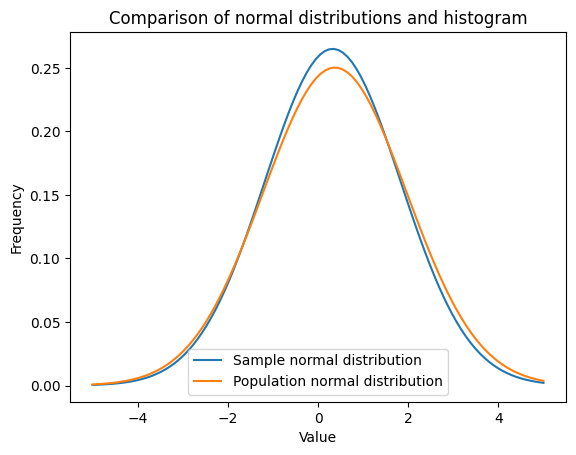

In [27]:
# 绘制图像
# 绘制满足这两个样本均值和方差的正态分布函数图像
x = np.linspace(-5,5,num=100)
y_sample = (1/np.sqrt(2*np.pi*sample_var))*np.exp(-((x-sample_mean)**2)/(2*sample_var))
y_pop = (1/np.sqrt(2*np.pi*pop_var))*np.exp(-((x-pop_mean)**2)/(2*pop_var))
plt.plot(x,y_sample,label="Sample normal distribution")
plt.plot(x,y_pop,label="Population normal distribution")
plt.legend()

# 绘制
plt.title("Comparison of normal distributions and histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()